In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('inspection2023_Ver2.csv')
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,pop_sqkm,num_crime_in2021,Hispanic or Latino,white,Black or African American,American Indian,Asian,Hawaiian,other,new_cuisine
0,50088158,XIANG HOTPOT,Brooklyn,5816,FORT HAMILTON PARKWAY,11219,7188515888,Chinese,2023-02-13,Violations were cited in the following area(s).,...,13647.113438,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Chinese
1,50131276,WHATSUP CAFE,Brooklyn,6609,FORT HAMILTON PARKWAY,11219,7187907666,Asian/Asian Fusion,2023-03-23,Violations were cited in the following area(s).,...,13647.113438,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Asian
2,50052708,PARC OASIS,Brooklyn,6403,11 AVENUE,11219,9292922010,Seafood,2023-02-23,Violations were cited in the following area(s).,...,13647.113438,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Meat
3,41028194,SAI'S CAFE,Brooklyn,6003,FORT HAMILTON PARKWAY,11219,6463611524,Bakery Products/Desserts,2023-02-28,Violations were cited in the following area(s).,...,13647.113438,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Bakery/Dessert
4,50049290,ORCHIDEA RESTAURANT,Brooklyn,4815,12 AVENUE,11219,7186867500,Jewish/Kosher,2023-02-06,Violations were cited in the following area(s).,...,13647.113438,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Jewish


In [3]:
data.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1', 'cuisine', 'num_foodDO', 'median income',
       'pop_over25', 'bachelor_higher', 'prop_bachelor', 'POPULATION',
       'area_sqkm', 'pop_sqkm', 'num_crime_in2021', 'Hispanic or Latino',
       'white', 'Black or African American', 'American Indian', 'Asian',
       'Hawaiian', 'other', 'new_cuisine'],
      dtype='object')

In [4]:
zips = gpd.read_file('ZIP_CODE/ZIP_CODE_040114.shp')
zips.to_crs(4326,inplace=True)
zips = zips[['ZIPCODE', 'POPULATION', 'geometry']]
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)
zips.head()

,ZIPCODE,POPULATION,geometry
0,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,62426.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,83866.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,56527.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,72280.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


## Exploratory Data Analysis
A,B,C grade's proportions in each zip code, and visualized the geographic distribution

In [5]:
grade = data[['CAMIS','ZIPCODE','GRADE']]
zip_grade = pd.pivot_table(grade, values ='CAMIS',index='ZIPCODE',columns='GRADE',aggfunc = 'count')
zip_grade.head()

GRADE,A,B,C
ZIPCODE,,,
10002,163.0,53.0,32.0
10003,189.0,21.0,8.0
10004,220.0,16.0,12.0
10005,20.0,5.0,NaN
10006,14.0,NaN,NaN


In [6]:
zip_grade = zip_grade.fillna(0)
zip_grade.head()

GRADE,A,B,C
ZIPCODE,,,
10002,163.0,53.0,32.0
10003,189.0,21.0,8.0
10004,220.0,16.0,12.0
10005,20.0,5.0,0.0
10006,14.0,0.0,0.0


In [7]:
zip_grade['ttl'] = zip_grade.sum(axis=1)
zip_grade['A'] = zip_grade['A']/zip_grade['ttl']
zip_grade['B'] = zip_grade['B']/zip_grade['ttl']
zip_grade['C'] = zip_grade['C']/zip_grade['ttl']
zip_grade.head()

GRADE,A,B,C,ttl
ZIPCODE,,,,
10002,0.657258,0.213710,0.129032,248.0
10003,0.866972,0.096330,0.036697,218.0
10004,0.887097,0.064516,0.048387,248.0
10005,0.800000,0.200000,0.000000,25.0
10006,1.000000,0.000000,0.000000,14.0


In [8]:
geozip_grade = zip_grade.merge(zips, left_index=True, right_on='ZIPCODE',how='right')

In [9]:
geoGrade = GeoDataFrame(geozip_grade, crs="EPSG:4326")
type(geoGrade)

geopandas.geodataframe.GeoDataFrame

(-74.28356467827875, -73.6717968930544, 40.47487170217615, 40.93613337447149)

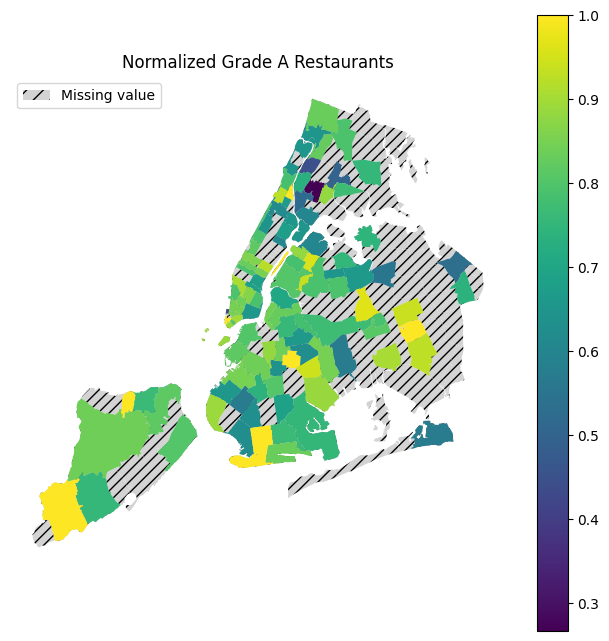

In [10]:
fig,ax = plt.subplots(figsize=(8,8))
geoGrade.plot(facecolor='lightgrey',hatch='///',ax=ax)
geoGrade.loc[~geoGrade['A'].isnull()].plot(column='A',legend=True,ax=ax)

LegendElement = [
                mpatches.Patch(facecolor='lightgrey', hatch='//', label='Missing value')
                ]
ax.legend(handles = LegendElement, loc='upper left')
plt.title('Normalized Grade A Restaurants')
ax.axis('off')

(-74.28356467827875, -73.6717968930544, 40.47487170217615, 40.93613337447149)

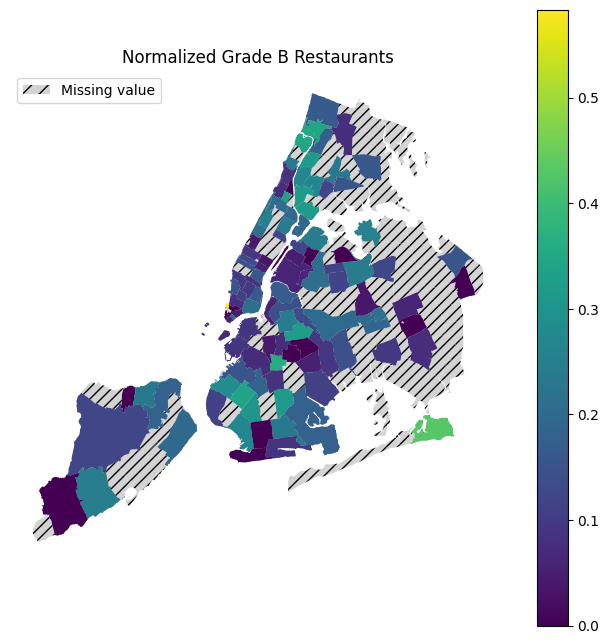

In [11]:
fig,ax = plt.subplots(figsize=(8,8))
geoGrade.plot(facecolor='lightgrey',hatch='///',ax=ax)
geoGrade.loc[~geoGrade['B'].isnull()].plot(column='B',legend=True,ax=ax)

LegendElement = [
                mpatches.Patch(facecolor='lightgrey', hatch='//', label='Missing value')
                ]
ax.legend(handles = LegendElement, loc='upper left')
plt.title('Normalized Grade B Restaurants')
ax.axis('off')

(-74.28356467827875, -73.6717968930544, 40.47487170217615, 40.93613337447149)

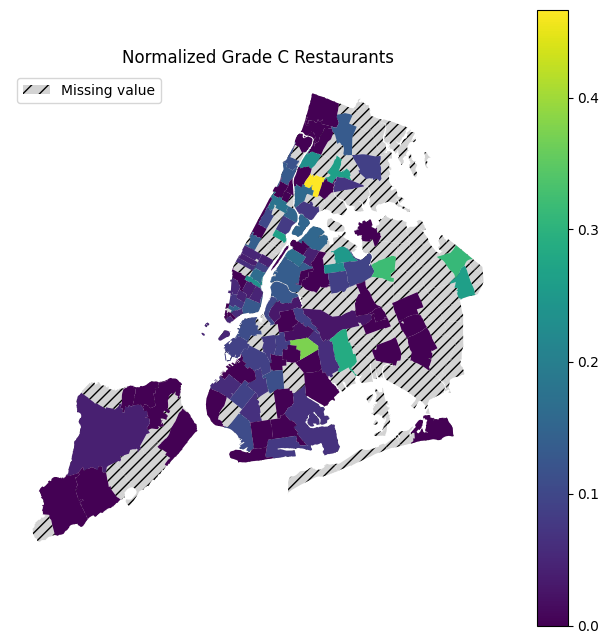

In [12]:
fig,ax = plt.subplots(figsize=(8,8))
geoGrade.plot(facecolor='lightgrey',hatch='///',ax=ax)
geoGrade.loc[~geoGrade['C'].isnull()].plot(column='C',legend=True,ax=ax)

LegendElement = [
                mpatches.Patch(facecolor='lightgrey', hatch='//', label='Missing value')
                ]
ax.legend(handles = LegendElement, loc='upper left')
plt.title('Normalized Grade C Restaurants')
ax.axis('off')

## Anomaly Detection
(Cluster-based)

In [13]:
zip_grade = zip_grade.reset_index()
zip_grade.head()

GRADE,ZIPCODE,A,B,C,ttl
0,10002,0.657258,0.213710,0.129032,248.0
1,10003,0.866972,0.096330,0.036697,218.0
2,10004,0.887097,0.064516,0.048387,248.0
3,10005,0.800000,0.200000,0.000000,25.0
4,10006,1.000000,0.000000,0.000000,14.0


In [14]:
from sklearn.cluster import KMeans
X = zip_grade[['A','B','C']]
KM=KMeans(n_clusters=3,random_state=999)
scor=KM.fit_predict(X)

res=pd.DataFrame(KM.transform(X))
res.head()

/Users/Joyce/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2
0,0.265448,0.101765,0.177849
1,0.015259,0.262749,0.368928
2,0.024742,0.298984,0.382100
3,0.143650,0.154207,0.352238
4,0.158762,0.428806,0.513988


In [15]:
res=pd.concat((res,pd.DataFrame(KM.fit_predict(X))),axis=1)
res.columns=list(range(3))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

/Users/Joyce/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
anomaly_grade = pd.concat((res, zip_grade),axis = 1)
anomaly_grade.head()

,0,1,2,cluster,score,ZIPCODE,A,B,C,ttl
0,0.265448,0.101765,0.177849,1,0.101765,10002,0.657258,0.213710,0.129032,248.0
1,0.015259,0.262749,0.368928,0,0.015259,10003,0.866972,0.096330,0.036697,218.0
2,0.024742,0.298984,0.382100,0,0.024742,10004,0.887097,0.064516,0.048387,248.0
3,0.143650,0.154207,0.352238,0,0.143650,10005,0.800000,0.200000,0.000000,25.0
4,0.158762,0.428806,0.513988,0,0.158762,10006,1.000000,0.000000,0.000000,14.0


In [17]:
anomaly_grade.sort_values("score",ascending=False)[:5]

,0,1,2,cluster,score,ZIPCODE,A,B,C,ttl
34,0.677568,0.405158,0.550225,1,0.405158,10282,0.416667,0.583333,0.000000,12.0
46,0.761163,0.583499,0.395839,2,0.395839,10456,0.266667,0.266667,0.466667,15.0
44,0.522295,0.296468,0.232983,2,0.232983,10453,0.446809,0.319149,0.234043,47.0
97,0.254221,0.348432,0.214388,2,0.214388,11369,0.750000,0.000000,0.250000,8.0
106,0.268353,0.352647,0.205294,2,0.205294,11426,0.739130,0.000000,0.260870,23.0


In [18]:
geo_anomaly_grade = anomaly_grade.merge(zips, left_on='ZIPCODE',right_on='ZIPCODE',how='right')
geo_anomaly_grade = GeoDataFrame(geo_anomaly_grade, crs="EPSG:4326")
type(geo_anomaly_grade)

geopandas.geodataframe.GeoDataFrame

(-74.28356467827875, -73.6717968930544, 40.47487170217615, 40.93613337447149)

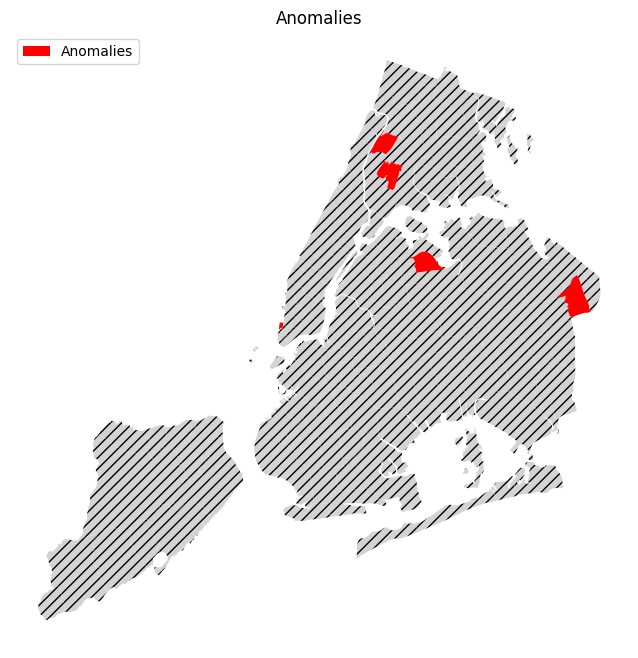

In [19]:
fig,ax = plt.subplots(figsize=(8,8))
geo_anomaly_grade.plot(facecolor='lightgrey',hatch='///',ax=ax)
geo_anomaly_grade.loc[geo_anomaly_grade['score']>=0.20].plot(facecolor='red',legend=True,ax=ax)

LegendElement = [
                mpatches.Patch(facecolor='red', label='Anomalies')
                ]
ax.legend(handles = LegendElement, loc='upper left')
plt.title('Anomalies')
ax.axis('off')

### Spatial Distribution of Food scrap drop off location

In [20]:
dropoff = pd.read_csv('dropoff.csv')
dropoff.head()

,ZIPCODE,num_foodDO
0,10002,3
1,10003,2
2,10004,5
3,10005,2
4,10006,2


In [21]:
dropoff = dropoff.merge(zips,left_on='ZIPCODE',right_on='ZIPCODE',how='right')

In [22]:
dropoff['num_foodDO'].fillna(0,inplace=True)

In [23]:
geo_DO = GeoDataFrame(dropoff, crs="EPSG:4326")

Text(0.5, 1.0, 'Number of food scrap drop off location')

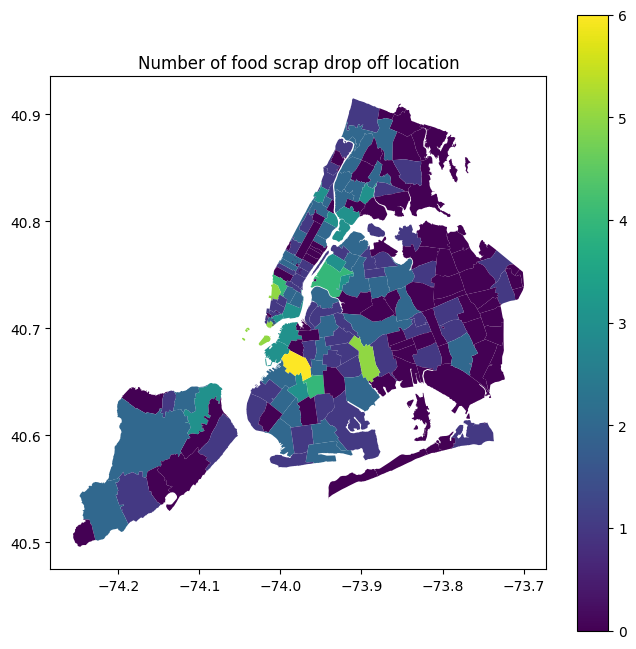

In [24]:
geo_DO.plot(figsize=(8,8),column='num_foodDO',legend=True)
plt.title('Number of food scrap drop off location')

### Median Income

In [25]:
income = pd.read_csv('medianincome.csv',dtype={'median income':'float'})
income = income.merge(zips,left_on='ZIP',right_on='ZIPCODE',how='right')

In [26]:
geo_income = GeoDataFrame(income, crs="EPSG:4326")

Text(0.5, 1.0, 'Median income')

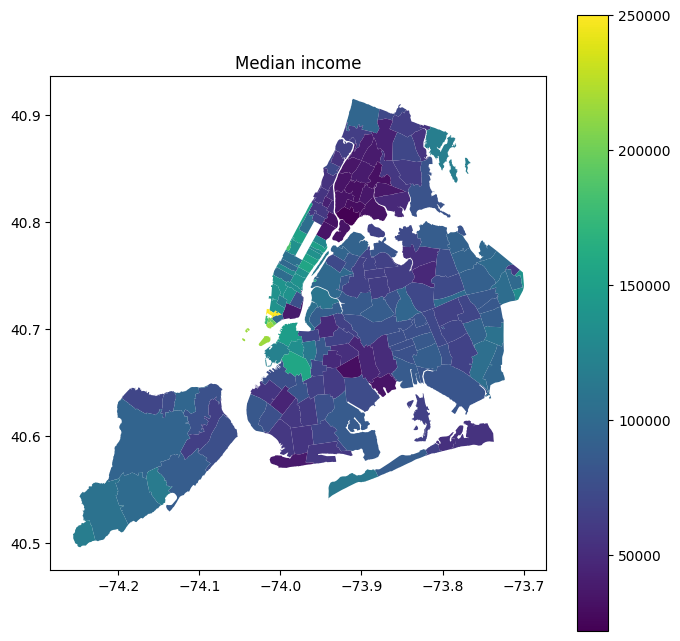

In [60]:
import mapclassify
geo_income.plot(figsize=(8,8),column='median income',legend=True)
plt.title('Median income')

### Education Attainment

In [56]:
edu = pd.read_csv('bachelor_attainment.csv')
edu = edu[['ZIP','prop_bachelor']]
edu.head()

,ZIP,prop_bachelor
0,10001,0.731405
1,10002,0.363771
2,10003,0.823698
3,10004,0.965508
4,10005,0.926783


In [57]:
edu = edu.merge(zips,left_on='ZIP',right_on='ZIPCODE',how='right')

In [58]:
geo_edu = GeoDataFrame(edu, crs="EPSG:4326")

Text(0.5, 1.0, 'Bachelor Attainment')

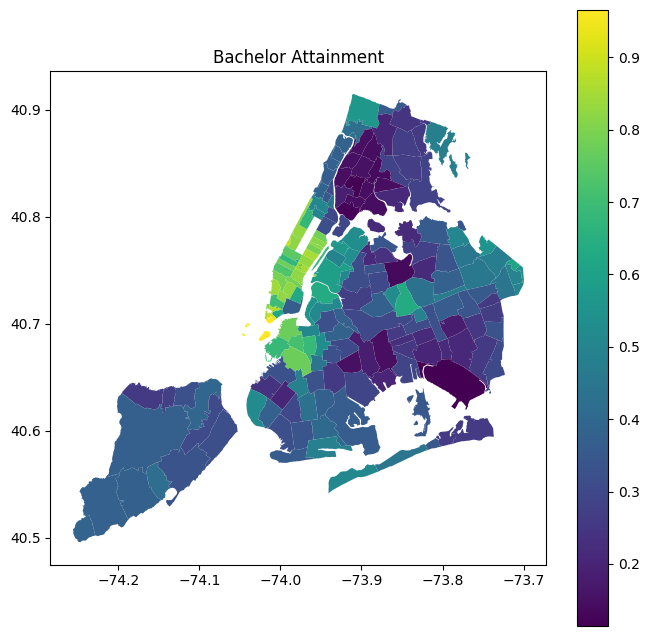

In [59]:
geo_edu.plot(figsize=(8,8),column='prop_bachelor',legend=True)
plt.title('Bachelor Attainment')

### Population Density

In [61]:
pop = pd.read_csv('population_area.csv')
pop = pop[['ZIPCODE','pop_sqkm']]
pop.head()

,ZIPCODE,pop_sqkm
0,11436,5090.014365
1,11213,13032.016171
2,11212,12363.058644
3,11225,14758.065021
4,11218,12137.035633


In [62]:
pop = pop.merge(zips,left_on='ZIPCODE',right_on='ZIPCODE',how='right')

In [63]:
geo_pop = GeoDataFrame(pop, crs="EPSG:4326")

Text(0.5, 1.0, 'Population Density')

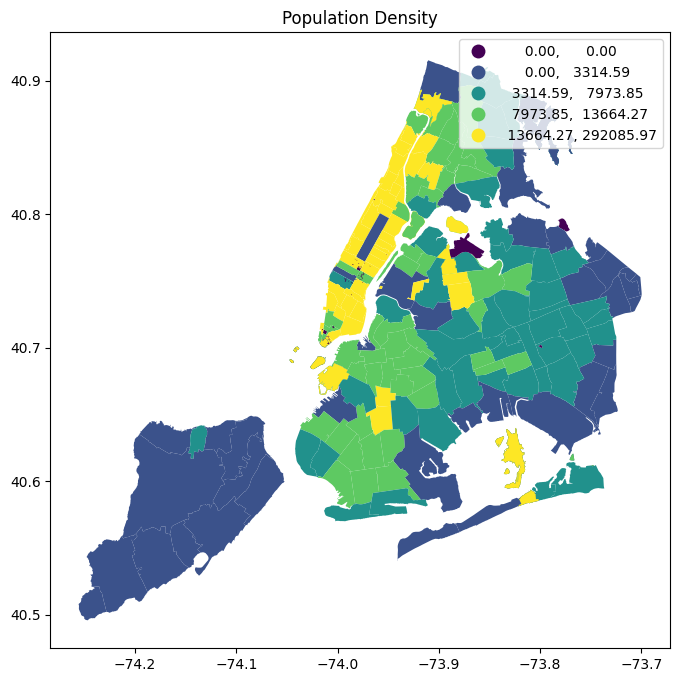

In [67]:
geo_pop.plot(figsize=(8,8),column='pop_sqkm',scheme='Quantiles', legend=True)
plt.title('Population Density')

### Crime Statistics

In [69]:
crime = pd.read_csv('crime.csv')
crime = crime.merge(zips,left_on='ZIPCODE',right_on='ZIPCODE',how='right')
geo_crime = GeoDataFrame(crime, crs="EPSG:4326")

Text(0.5, 1.0, 'Number of Crime')

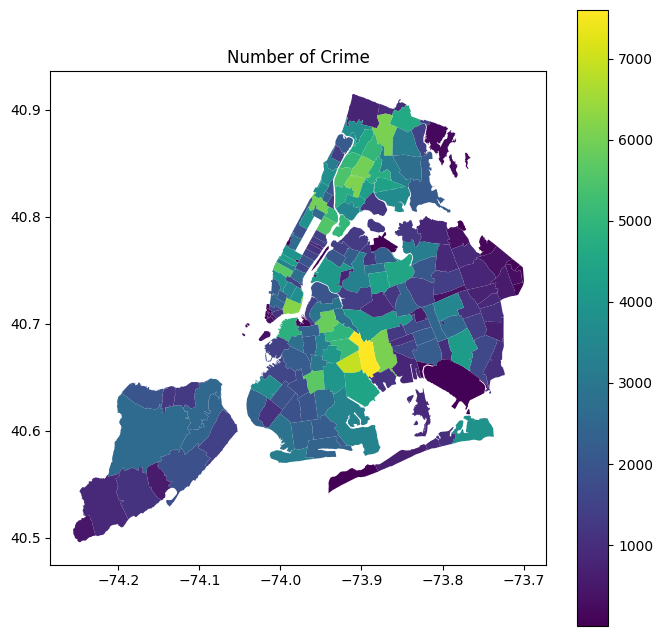

In [70]:
geo_crime.plot(figsize=(8,8),column='num_crime_in2021',legend=True)
plt.title('Number of Crime')

### Demographic

In [72]:
race = pd.read_csv('zip_race.csv')
race = race.merge(zips,left_on='ZIP',right_on='ZIPCODE',how='right')

In [73]:
geo_race = GeoDataFrame(race, crs="EPSG:4326")

In [78]:
race.columns[2:9]

Index(['Hispanic or Latino', 'white', 'Black or African American',
       'American Indian', 'Asian', 'Hawaiian', 'other'],
      dtype='object')

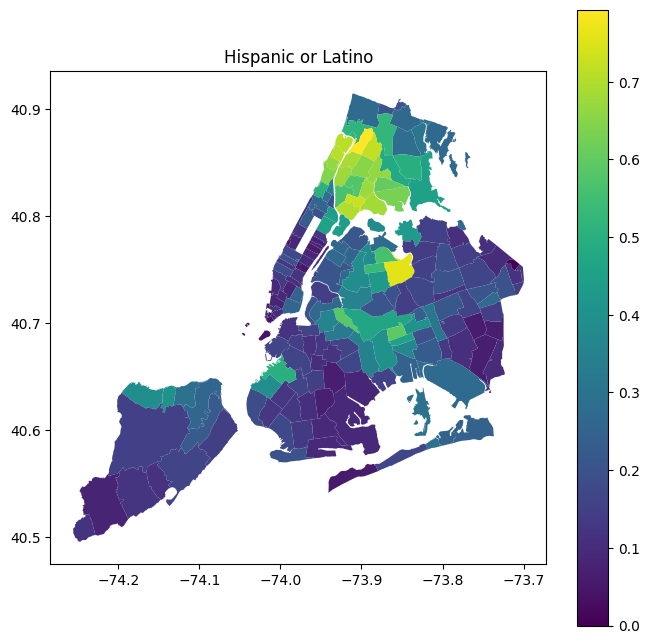

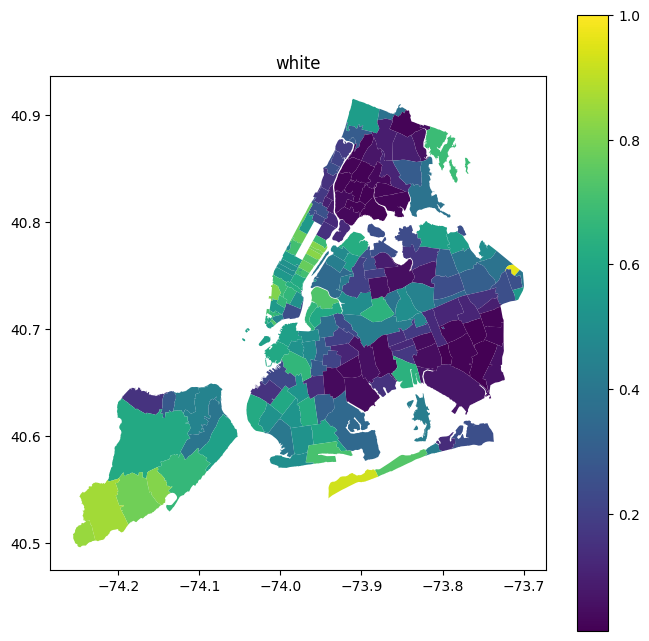

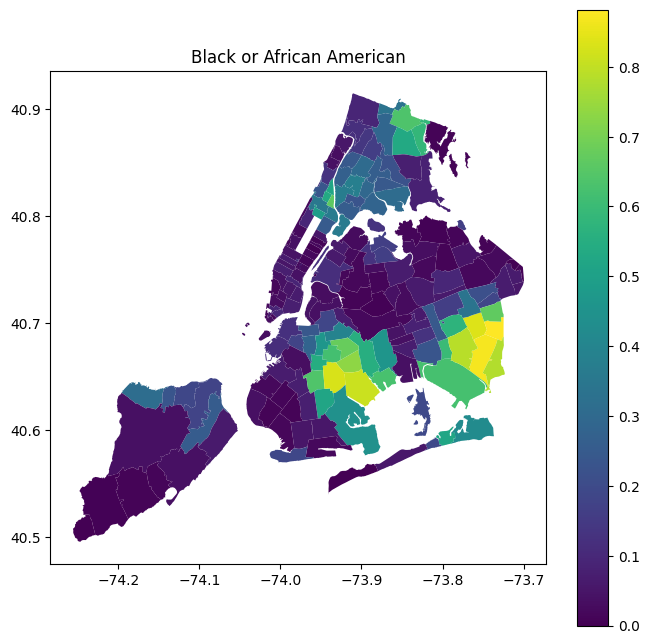

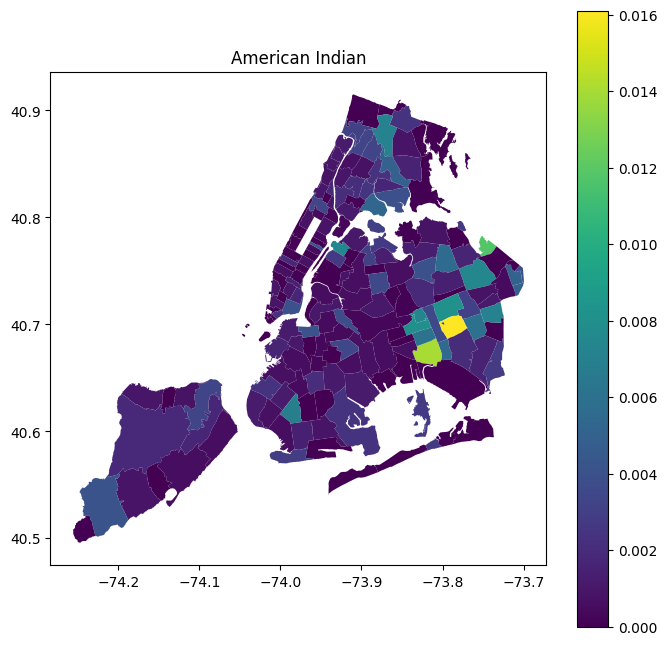

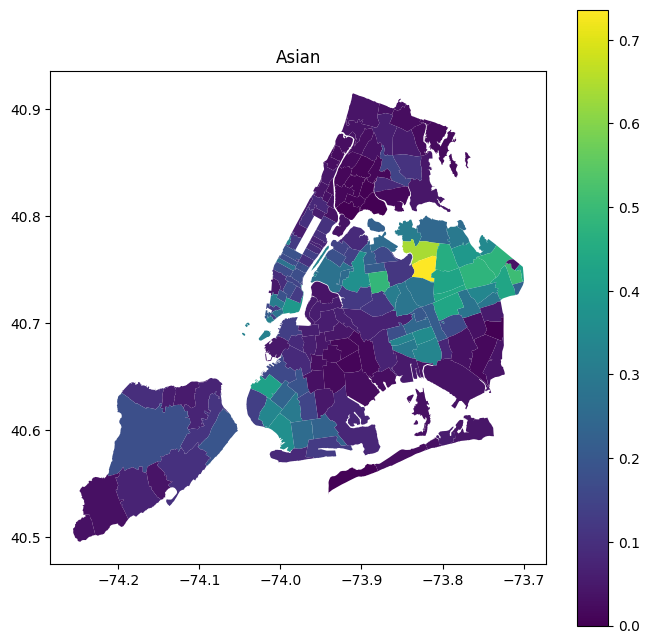

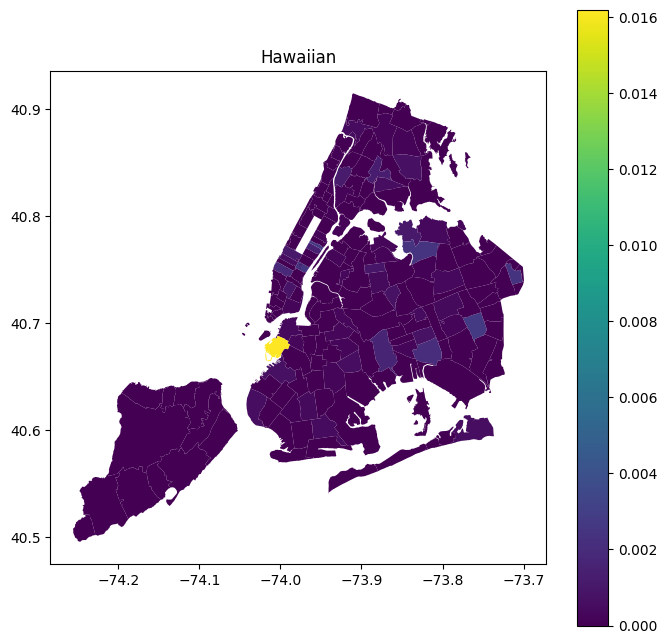

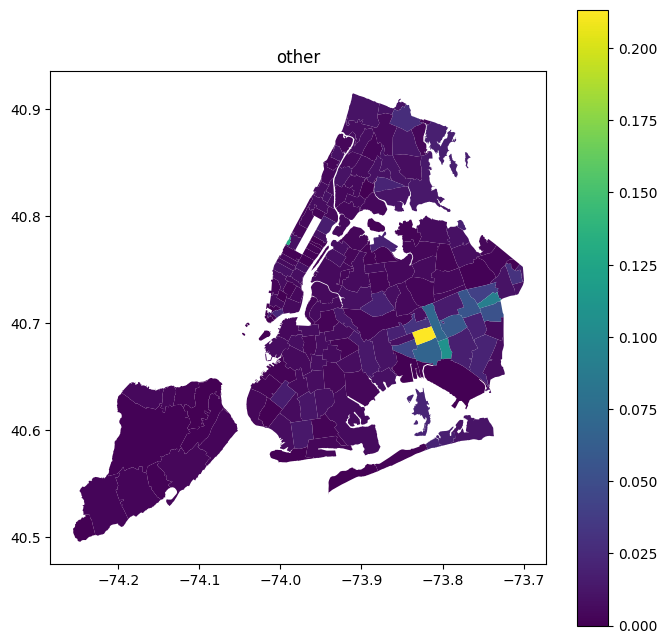

In [80]:
for i in race.columns[2:9]:
    geo_race.plot(figsize=(8,8),column=i,legend=True)
    plt.title(i)